# Association Rules - Market Basket Analysis

## Libraries Required for Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Context of Dataset
Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

This dataset is also available from the https://www.kaggle.com/mashlyn/online-retail-ii-uci

**Dataset is not uploaded to Github repository because it is larger than 25MB which is blocked by Github. You can follow the link to download the dataset**

### Content of Dataset


*Input variables:*


1. *nvoiceNo*: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

2. *StockCode*: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

3. *Description*: Product (item) name. Nominal.

4. *Quantity*: The quantities of each product (item) per transaction. Numeric.

5. *InvoiceDate*: Invice date and time. Numeric. The day and time when a transaction was generated.

6. *UnitPrice*: Unit price. Numeric. Product price per unit in sterling (Â£).

7. *CustomerID*: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

8. *Country*: Country name. Nominal. The name of the country where a customer resides.


### Relevant Publication Regarding the Dataset

*Chen, D. Sain, S.L., and Guo, K.* (2012), Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208. 

*Chen, D., Guo, K. and Ubakanma, G.* (2015), Predicting customer profitability over time based on RFM time series, International Journal of Business Forecasting and Marketing Intelligence, Vol. 2, No. 1, pp.1-18. 

*Laha Ale, Ning Zhang, Huici Wu, Dajiang Chen, and Tao Han*, Online Proactive Caching in Mobile Edge Computing Using Bidirectional Deep Recurrent Neural Network, IEEE Internet of Things Journal, Vol. 6, Issue 3, pp. 5520-5530, 2019.

*Rina Singh, Jeffrey A. Graves, Douglas A. Talbert, William Eberle*, Prefix and Suffix Sequential Pattern Mining, Industrial Conference on Data Mining 2018: Advances in Data Mining. Applications and Theoretical Aspects, pp. 309-324. 2018.

In [2]:
df = pd.read_csv('online_retail_II.csv')

In [3]:
df.shape

(1067371, 8)

In [4]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

The Online Retail Datase consists of 1067371 rows and 8 columns which also indicates that there is a huge possibility to have some missing values in the rows

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Let's try to understand the dataset first before moving into the analysis

In [7]:
df['Country'].nunique()

43

In [8]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

In [9]:
df['Invoice'].nunique()

53628

In [10]:
df['Description'].nunique()

5698

C:\Users\Lanzelit\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lanzelit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


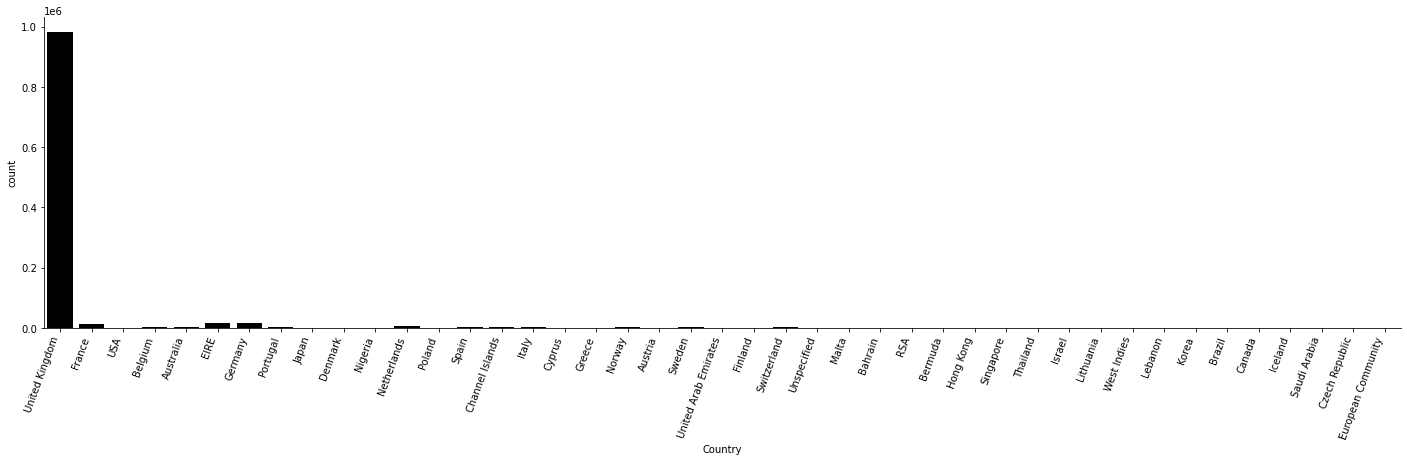

In [11]:
graph1 = sns.factorplot("Country", data=df, aspect=4, kind="count", color="black")
graph1.set_xticklabels(rotation=70, ha="right")

In [12]:
df['Country'].value_counts()

United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
USA                        535
Poland                     535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169
Bahrain 

In [13]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


Let's check if is there any missing value 

In [14]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

As we just guessed, there are a lot of missing values. So somehow we have to deal with that to get better results

# Data Cleaning

Very important step, we must always work with data already processed, so that our algorithms are more accurate, in this dataset, there are records with null values, canceled orders and unformatted texts. All these steps can affect our results.


In [15]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0,subset=['Invoice'],inplace=True)

Remove canceled orders

it involves the data clean up over some of the description so we will drop the rows with no invoice number and credit transition

In [16]:
df['Invoice'] = df['Invoice'].astype('str')
df= df[~df['Invoice'].str.contains('C')]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [17]:
df.dropna(subset = ['Description'], inplace=True)

<ipython-input-17-9ca77e862ab8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ['Description'], inplace=True)


In [18]:
df.dropna(subset = ['Customer ID'], inplace=True)

<ipython-input-18-51f7eccf5552>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ['Customer ID'], inplace=True)


So we can check did we deal with the missing values

In [19]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

We don't have any missing value anymore, so we can move to the Association Rule

# Association Rule Mining

Association rule mining finds interesting associations and relationships among large sets of data items. This rule shows how frequently a itemset occurs in a transaction. A typical example is Market Based Analysis.

Market Based Analysis is one of the key techniques used by large relations to show associations between items.It allows retailers to identify relationships between the items that people buy together frequently.
Given a set of transactions, we can find rules that will predict the occurrence of an item based on the occurrences of other items in the transaction.

## Definition
Association rules analysis is a technique to uncover how items are associated to each other. There are three common ways to measure association.

1. **Support**. This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. 


2. **Confidence**. This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears

3. **Lift**. This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. 

## Get Best Assocaites for Netherlands

To apply the Association Rules algorithm;

it is necessary to convert the database into a matrix, which displays the occurrence (was purchased or not) of products. In other words, first we need to group these products by order and transform them into a matrix of 0 and 1. With 0 that there was no purchase of the product and 1 that the purchase was made.


Ps. Reason for me to choose Netherlands over United Kingdom is that calculating for UK takes much more time than other countries because UK is alone makes up more than half of this dataset.

In [20]:
basket_netherlands = (df[df['Country'] =="Netherlands"]
.pivot_table(index="Invoice", columns="Description", values="Quantity", aggfunc="sum",fill_value=0) )

In [21]:
basket_netherlands.head()

Description,10 COLOUR SPACEBOY PEN,12 ASS ZINC CHRISTMAS DECORATIONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,...,YELLOW METAL CHICKEN HEART,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,216,0,0,0
489890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490158,0,0,0,24,0,0,0,0,0,12,...,0,0,0,0,0,0,12,0,0,0
490964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
492248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
netherlands_sets = basket_netherlands.applymap(lambda  x:1 if x>0 else 0)
netherlands_sets.drop('POSTAGE', inplace=True, axis=1)

In [23]:
frequent_items = apriori(netherlands_sets, min_support=0.07, use_colnames=True)

In [24]:
netherlands_rules = association_rules(frequent_items, metric="lift", min_threshold=1)
netherlands_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DOLLY GIRL LUNCH BOX),(ROUND SNACK BOXES SET OF 4 FRUITS),0.183406,0.144105,0.082969,0.452381,3.139250,0.056540,1.562939
1,(ROUND SNACK BOXES SET OF 4 FRUITS),(DOLLY GIRL LUNCH BOX),0.144105,0.183406,0.082969,0.575758,3.139250,0.056540,1.924828
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(DOLLY GIRL LUNCH BOX),0.196507,0.183406,0.091703,0.466667,2.544444,0.055663,1.531114
3,(DOLLY GIRL LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.183406,0.196507,0.091703,0.500000,2.544444,0.055663,1.606987
4,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.205240,0.183406,0.165939,0.808511,4.408308,0.128297,4.264435


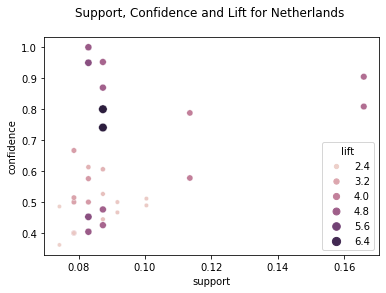

In [25]:
sns.scatterplot(x = netherlands_rules['support'], y = netherlands_rules['confidence'], size = netherlands_rules['lift'], hue = netherlands_rules['lift'])
plt.title('Support, Confidence and Lift for Netherlands \n')
plt.show()

In [26]:
best_netherlands_associate = association_rules(df = frequent_items, metric='confidence',min_threshold= 0.7)
best_netherlands_associate

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.205240,0.183406,0.165939,0.808511,4.408308,0.128297,4.264435
1,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.183406,0.205240,0.165939,0.904762,4.408308,0.128297,8.344978
2,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.109170,0.117904,0.087336,0.800000,6.785185,0.074465,4.410480
3,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.117904,0.109170,0.087336,0.740741,6.785185,0.074465,3.436057
4,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.144105,0.196507,0.113537,0.787879,4.009428,0.085220,3.787898
5,"(SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF ...",(DOLLY GIRL LUNCH BOX),0.087336,0.183406,0.082969,0.950000,5.179762,0.066951,16.331878
6,"(ROUND SNACK BOXES SET OF 4 FRUITS, DOLLY GIRL...",(SPACEBOY LUNCH BOX),0.082969,0.205240,0.082969,1.000000,4.872340,0.065941,inf
7,"(SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4...",(DOLLY GIRL LUNCH BOX),0.100437,0.183406,0.087336,0.869565,4.741201,0.068916,6.260553
8,"(ROUND SNACK BOXES SET OF4 WOODLAND, DOLLY GIR...",(SPACEBOY LUNCH BOX),0.091703,0.205240,0.087336,0.952381,4.640324,0.068515,16.689956


filtering rules having high strength using higher lift and confidence value

In [27]:
highest_netherlands = netherlands_rules[(netherlands_rules['lift'] >= 6) &(netherlands_rules['confidence'] >= 0.7) ]
highest_netherlands

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.109170,0.117904,0.087336,0.800000,6.785185,0.074465,4.410480
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.117904,0.109170,0.087336,0.740741,6.785185,0.074465,3.436057


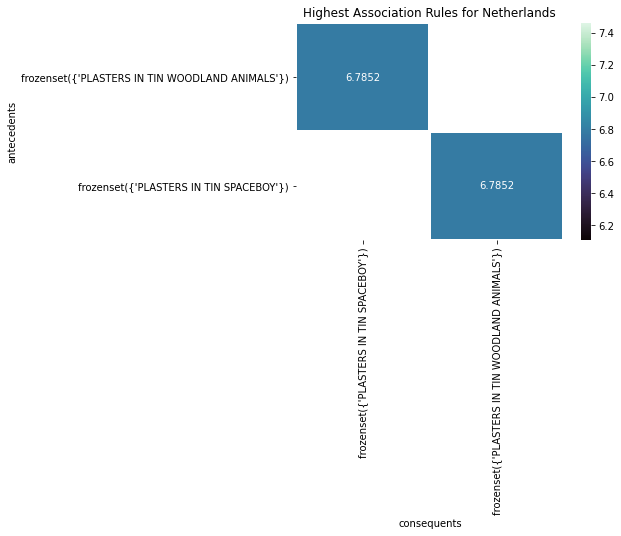

In [28]:
pv = highest_netherlands.pivot(index = 'antecedents', columns = 'consequents', values = 'lift')

sns.heatmap(pv, annot = True, fmt = '.4f', linewidths = 2, cmap = 'mako')
plt.title('Highest Association Rules for Netherlands')
plt.show()

# Assocaites for Germany

In [29]:
basket_germany = (df[df['Country'] =="Germany"].groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0).set_index('Invoice'))

In [30]:
germany_sets = basket_germany.applymap(lambda  x:1 if x>0 else 0)
germany_sets.drop('POSTAGE', inplace=True, axis=1)

In [31]:
frequent_itemsets2 = apriori(germany_sets, min_support=0.05, use_colnames=True)
germany_rules = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

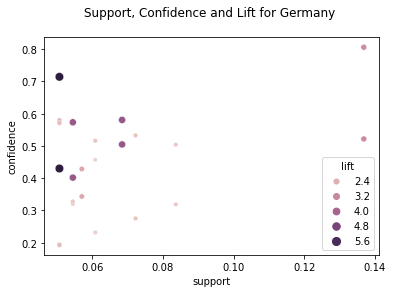

In [32]:
sns.scatterplot(x = germany_rules['support'], y = germany_rules['confidence'], size = germany_rules['lift'], hue = germany_rules['lift'])
plt.title('Support, Confidence and Lift for Germany \n')
plt.show()

In [33]:
germany_rules[(germany_rules['lift'] >= 3) & (germany_rules['confidence'] >= 0.3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN STRONGMAN),0.117871,0.070976,0.050697,0.430108,6.059908,0.042331,1.630174
1,(PLASTERS IN TIN STRONGMAN),(PLASTERS IN TIN CIRCUS PARADE),0.070976,0.117871,0.050697,0.714286,6.059908,0.042331,3.087452
2,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.117871,0.135615,0.068441,0.580645,4.281580,0.052456,2.061226
3,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.135615,0.117871,0.068441,0.504673,4.281580,0.052456,1.780903
6,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.135615,0.095057,0.054499,0.401869,4.227664,0.041608,1.512952
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.095057,0.135615,0.054499,0.573333,4.227664,0.041608,2.025903
14,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.262357,0.169835,0.136882,0.521739,3.072031,0.092325,1.735799
15,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.169835,0.262357,0.136882,0.805970,3.072031,0.092325,3.801696


In [34]:
germany_50_best =germany_rules.sort_values(by=(['confidence','antecedents']),ascending=False,).head(50)
germany_50_best

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.169835,0.262357,0.136882,0.805970,3.072031,0.092325,3.801696
1,(PLASTERS IN TIN STRONGMAN),(PLASTERS IN TIN CIRCUS PARADE),0.070976,0.117871,0.050697,0.714286,6.059908,0.042331,3.087452
2,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.117871,0.135615,0.068441,0.580645,4.281580,0.052456,2.061226
19,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.087452,0.262357,0.050697,0.579710,2.209620,0.027753,1.755081
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.095057,0.135615,0.054499,0.573333,4.227664,0.041608,2.025903
23,(WOODLAND PARTY BAG + STICKER SET),(ROUND SNACK BOXES SET OF4 WOODLAND),0.088720,0.262357,0.050697,0.571429,2.178054,0.027421,1.721166
9,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.135615,0.262357,0.072243,0.532710,2.030475,0.036664,1.578555
14,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.262357,0.169835,0.136882,0.521739,3.072031,0.092325,1.735799
4,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.117871,0.262357,0.060837,0.516129,1.967274,0.029912,1.524461
3,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.135615,0.117871,0.068441,0.504673,4.281580,0.052456,1.780903


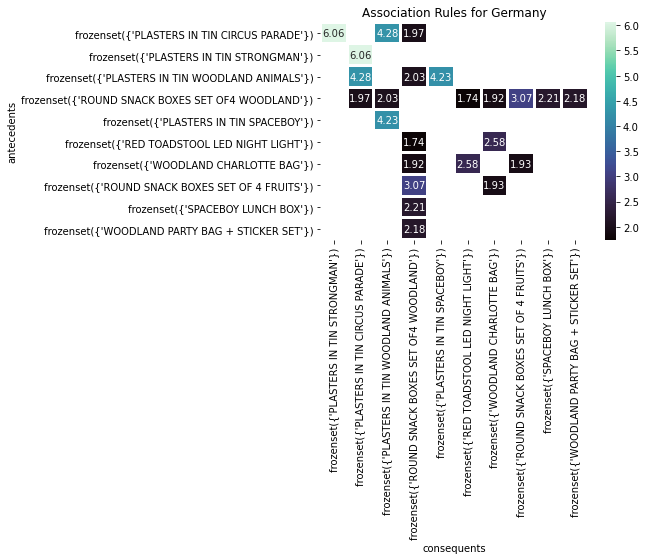

In [35]:
pv = germany_rules.pivot(index = 'antecedents', columns = 'consequents', values = 'lift')

sns.heatmap(pv, annot = True, fmt = '.2f', linewidths = 2, cmap = 'mako')
plt.title('Association Rules for Germany')
plt.show()

In [36]:
germany_rules = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.7)
germany_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN STRONGMAN),(PLASTERS IN TIN CIRCUS PARADE),0.070976,0.117871,0.050697,0.714286,6.059908,0.042331,3.087452
1,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.169835,0.262357,0.136882,0.805970,3.072031,0.092325,3.801696


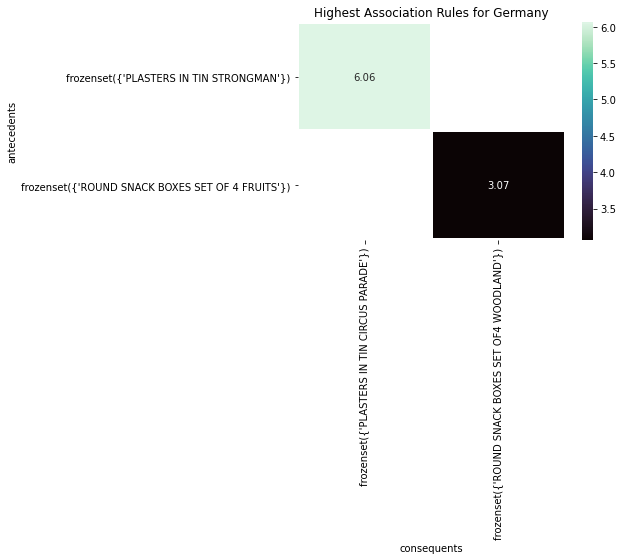

In [37]:
pv = germany_rules.pivot(index = 'antecedents', columns = 'consequents', values = 'lift')

sns.heatmap(pv, annot = True, fmt = '.2f', linewidths = 2, cmap = 'mako')
plt.title('Highest Association Rules for Germany')
plt.show()

# Conclusion

As we can see, shopping patterns revolve around bags that can be used to carry food, as well as fruit-shaped containers, it would be interesting to invest more in this. But with this result, a boost could be made in the offers on grants in this category and jointly recommended recipients. These rules feature up to 11% support and 80% confidence. having a lift greater than 1, which tells us that the purchase of the consequent, most of the time, occurs with these antecedents that were shown.

It was seen that the association rules is a simple method, however, it obtains interesting results. It is an unsupervised technique and we bring some hidden knowledge about the database. It can be used for several other problems, in addition to product recommendation. In this case study, it would be interesting to investigate more about canceled sales in order to find a pattern, and apply other data mining techniques on the base to predict quantities of products sold, the best customers and the best products in relation to the customer. country, price, etc.